In [1]:
library(statnet)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.0.1"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.1"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el = read.csv("../data/edgelist_2011.csv")

In [3]:
nl = read.csv("../data/nodelist_2011.csv")

In [4]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)

In [22]:
nl$log_area <- log(nl$area)

In [23]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')

In [24]:
set.edge.value(net, "trade", el$weight)

In [25]:
net

 Network attributes:
  vertices = 195 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 4014 
    missing edges= 0 
    non-missing edges= 4014 

 Vertex attribute names: 
    area colonizer continent country_iso3 gdp_growth gdp_us_dollar inflation_rate landlocked langoff_1 log_area vertex.names 

 Edge attribute names not shown 

In [52]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodeocov("gdp_us_dollar") +
                        absdiff("gdp_us_dollar") +
                        nodeocov("inflation_rate") +
                        absdiff("inflation_rate") +
                        nodeocov("gdp_growth") +
                        absdiff("gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.627648049271763.

The log-likelihood improved by 2.734.

Iteration 2 of at most 20:

Optimizing with step length 0.76231616316225.

The log-likelihood improved by 2.146.

Iteration 3 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.5746.

Step length converged once. Increasing MCMC sample size.

Iteration 4 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.1563.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnos

In [53]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodeocov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodeocov("inflation_rate") + absdiff("inflation_rate") + 
    nodeocov("gdp_growth") + absdiff("gdp_growth") + nodematch("colonizer") + 
    nodematch("continent") + nodematch("landlocked") + nodematch("langoff_1"))

Iterations:  4 out of 20 

Monte Carlo MLE Results:
                          Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                   -6.5813953  0.1880098      0 -35.006   <1e-04 ***
mutual                   0.4575941  0.0700776      0   6.530   <1e-04 ***
nodeocov.gdp_us_dollar   0.1802793  0.0074401      0  24.231   <1e-04 ***
absdiff.gdp_us_dollar    0.0783303  0.0076267      0  10.271   <1e-04 ***
nodeocov.inflation_rate  0.0005765  0.0039118      0   0.147   0.8828    
absdiff.inflation_rate  -0.0024025  0.0034267      0  -0.701   0.4832    
nodeocov.gdp_growth      0.0074560  0.0035022      0   2.129   0.0333 *  
absdiff.gdp_growth      -0.0068120 

In [54]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [55]:
gof


Goodness-of-fit for model statistics 

                              obs      min      mean       max MC p-value
edges                     4013.00  3883.00   3999.06   4131.00       0.70
mutual                     312.00   276.00    313.69    359.00       1.00
nodeocov.gdp_us_dollar  100547.08 97314.24 100196.29 103699.83       0.68
absdiff.gdp_us_dollar    12872.49 12362.79  12822.99  13339.01       0.72
nodeocov.inflation_rate  24097.75 22927.38  23965.19  25087.01       0.74
absdiff.inflation_rate   19963.72 18889.47  19872.70  21246.45       0.82
nodeocov.gdp_growth      15798.95 14894.33  15730.89  16811.53       0.88
absdiff.gdp_growth       18520.12 17542.63  18449.89  19584.19       0.86
nodematch.colonizer       1548.00  1458.00   1544.88   1635.00       0.80
nodematch.continent        593.00   523.00    595.75    656.00       0.96
nodematch.landlocked      2627.00  2516.00   2616.89   2719.00       0.76
nodematch.langoff_1        342.00   301.00    340.81    385.00       0.9

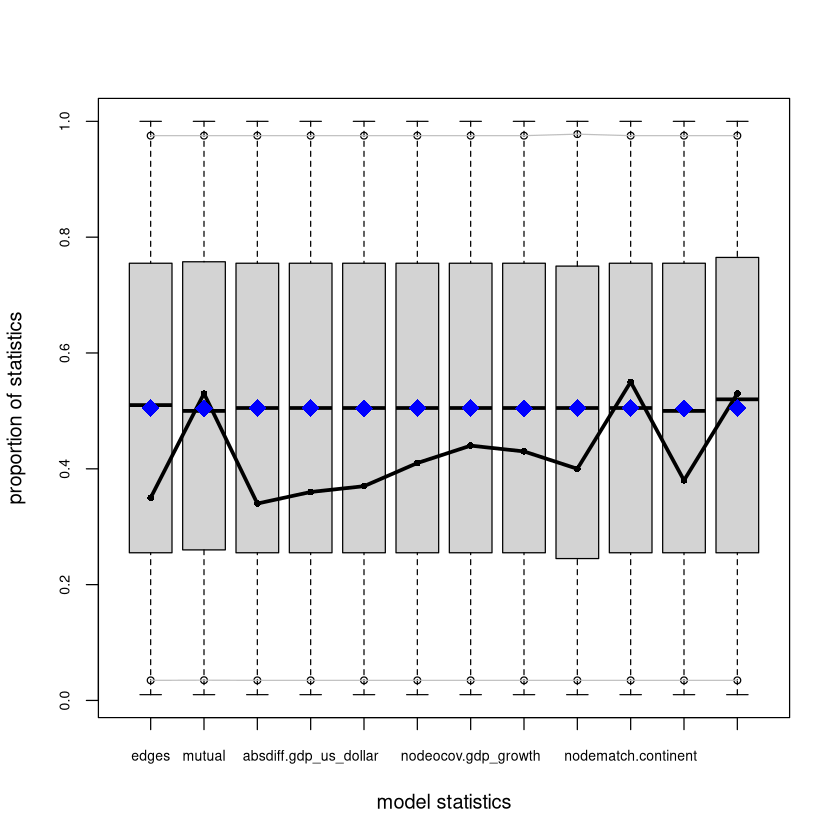

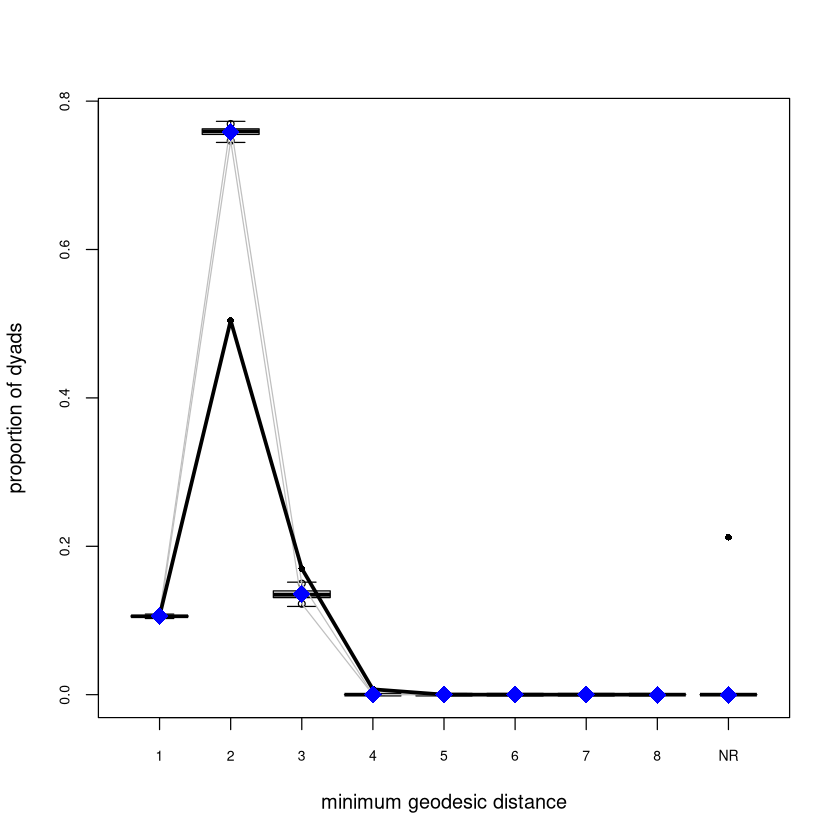

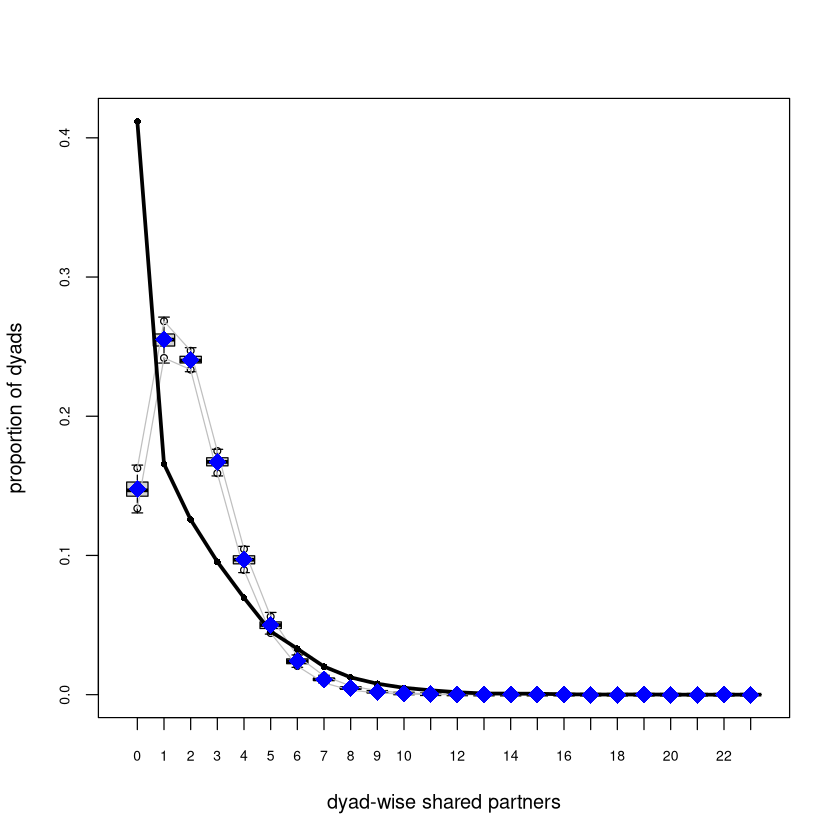

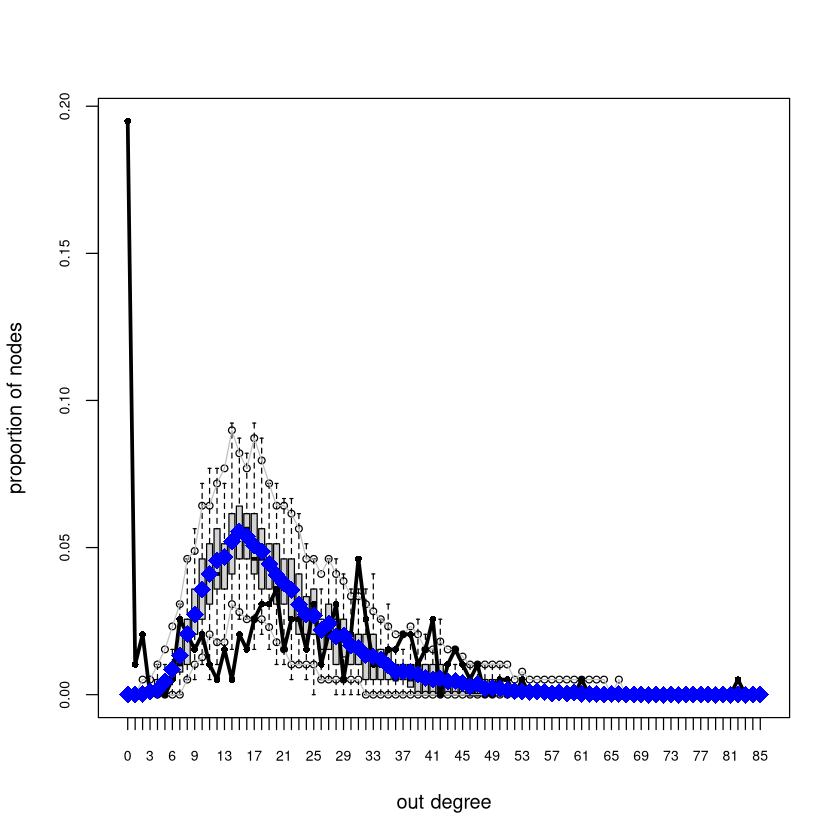

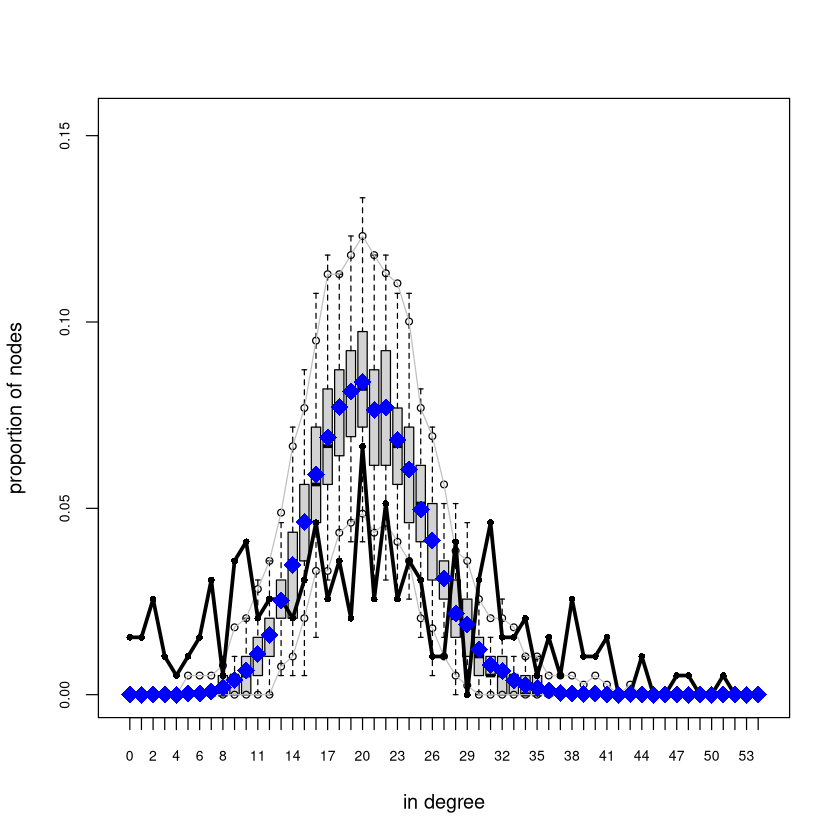

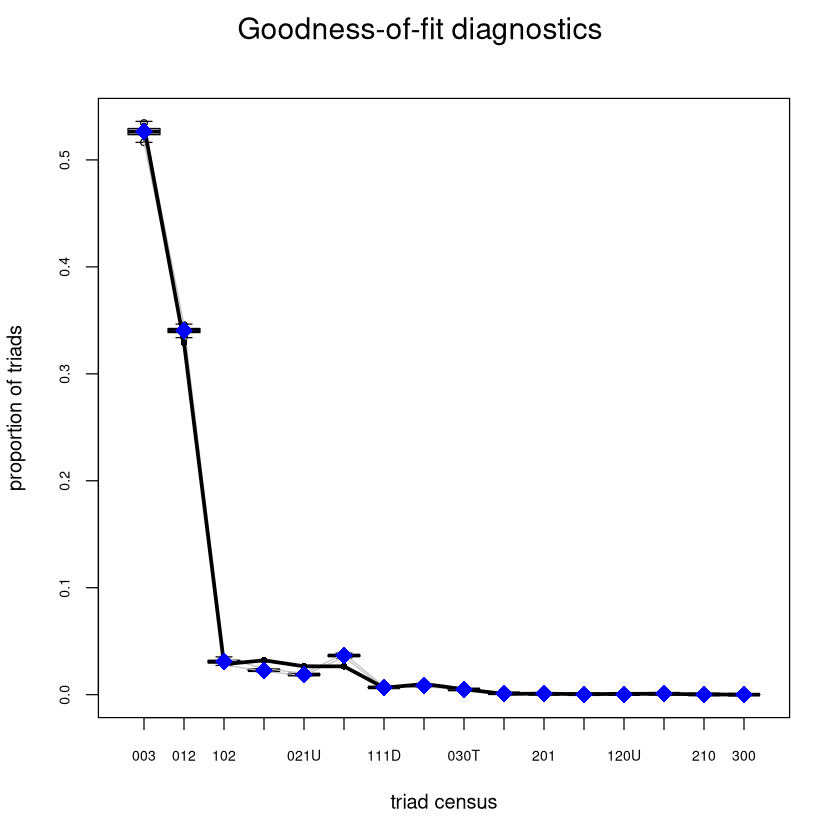

In [56]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                           Mean      SD Naive SE Time-series SE
edges                    19.467   61.81   0.9657          4.233
mutual                    1.189   16.74   0.2616          0.931
nodeocov.gdp_us_dollar  455.543 1535.38  23.9903        106.956
absdiff.gdp_us_dollar    75.793  234.41   3.6627         17.390
nodeocov.inflation_rate 170.053  512.27   8.0042         33.041
absdiff.inflation_rate  148.215  499.39   7.8029         32.926
nodeocov.gdp_growth      61.735  378.31   5.9110         25.263
absdiff.gdp_growth       83.005  462.81   7.2313         29.841
nodematch.colonizer      10.888   39.09   0.6108          2.774
nodematch.continent      -2.706   23.78   0.3715          1.465
nodematch.landlocked     14.281   50.48   0.7887          3.449
n

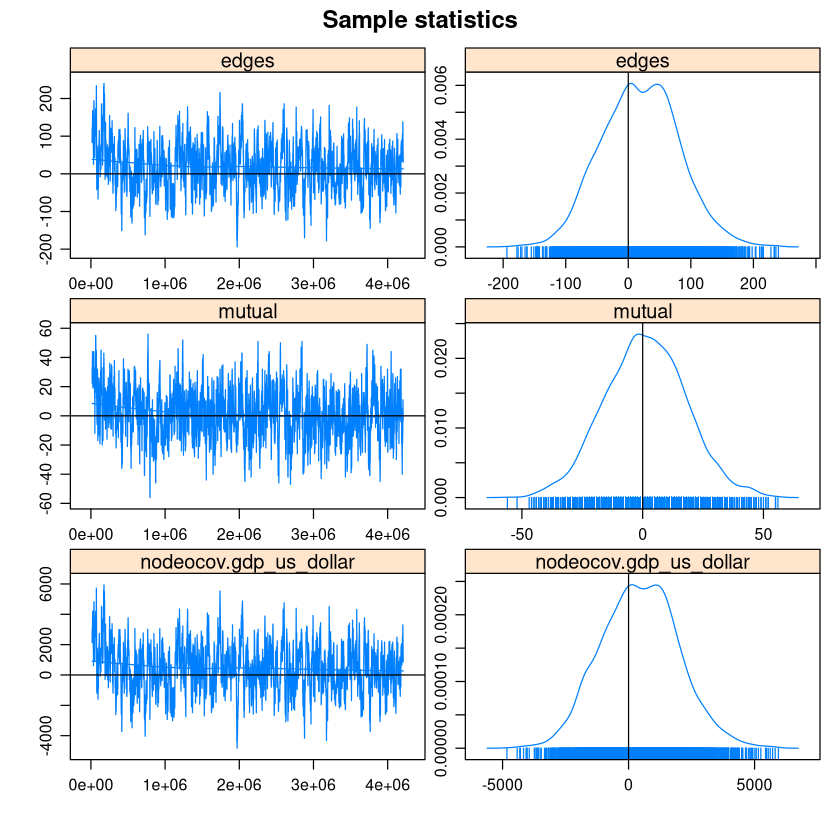

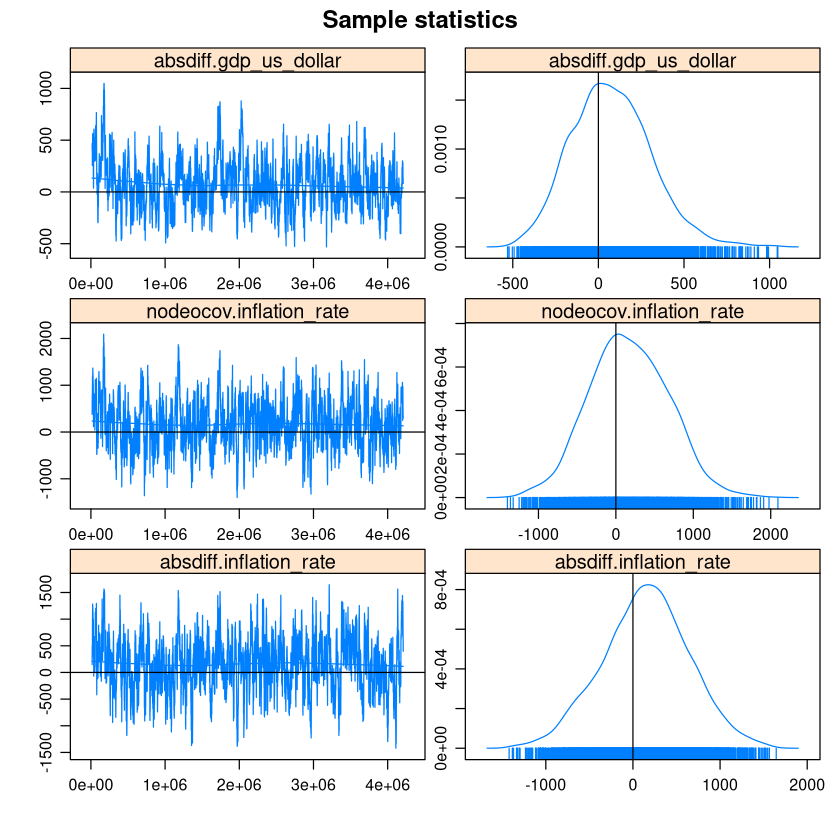

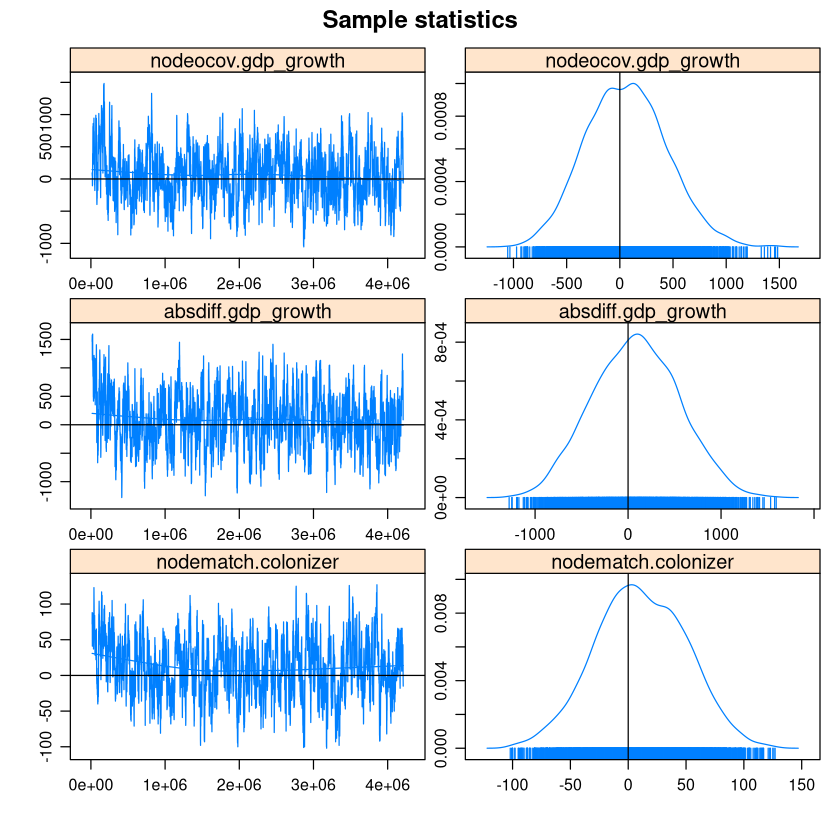


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


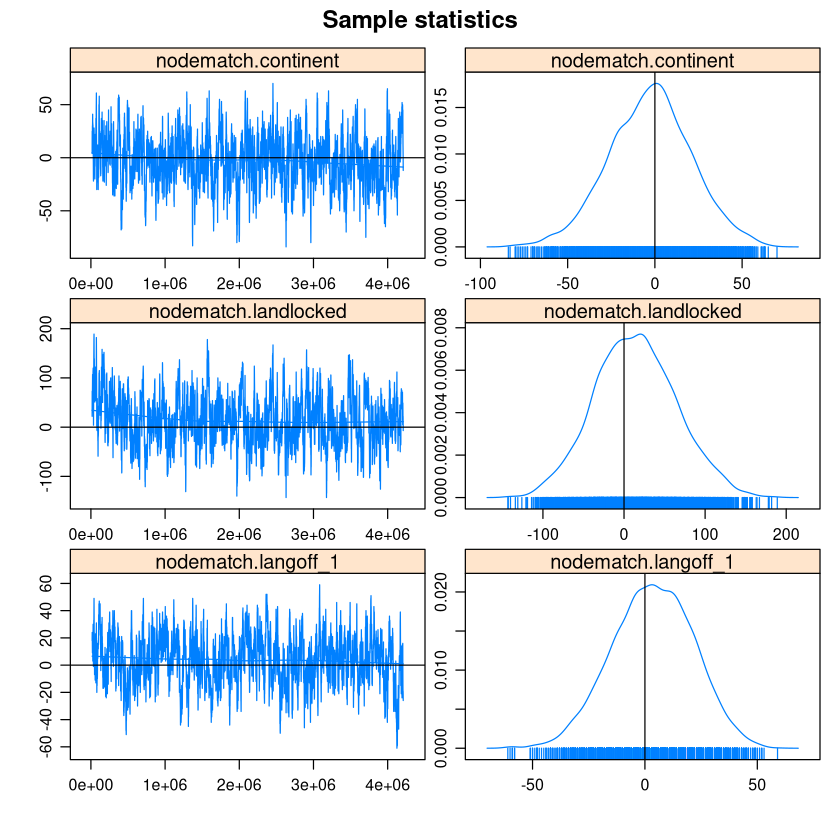

In [57]:
mcmc.diagnostics(model)